# K-Means Clustering

## Steps:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modeling
4. Modeling
5. Final analysis and reco

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the dataset
retail_df = pd.read_csv('Online+Retail.csv', encoding='ISO-8859-1', header=0, sep=',')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
retail_df.shape

(541909, 8)

In [6]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## 2. Clean the data

In [7]:
# Handle the missing values

round(100*retail_df.isnull().sum()/len(retail_df), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
# Remove the rows having missing values
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [9]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


## 3. Prepare the data

- Recency: Days since last transaction
- Frequency: Number of transactions
- Monetory: Total amount on transactions

Important steps:

- Outlier treatment
- Rescaling the attributes
- Hopkins statistics

In [10]:
# columns in dataframe we want
# cust_id recency frequency monetory

In [11]:
# new column: amount

retail_df['Amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [12]:
# See how much each customer has spent

monetory_df = retail_df.groupby('CustomerID')['Amount'].sum()
monetory_df = monetory_df.reset_index()
monetory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Amount      4372 non-null   float64
dtypes: float64(2)
memory usage: 68.4 KB


In [13]:
# Frequency of purchase

frequency_df = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency_df = frequency_df.reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Frequency   4372 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 68.4 KB


In [14]:
# Merge the two dataframes

rfm_df = pd.merge(monetory_df, frequency_df, on='CustomerID', how='inner')
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Amount      4372 non-null   float64
 2   Frequency   4372 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 102.6 KB


In [15]:
# Recency of purchase

retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [16]:

retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [18]:
# Compute the max date
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [19]:
# Compute the difference between max date and invoice date
retail_df['Diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [20]:
# Calculate the recency

recency_df = retail_df.groupby('CustomerID')['Diff'].min()

recency_df = recency_df.reset_index()
recency_df.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [21]:
# Merge the dataframes

rfm_df = pd.merge(rfm_df, recency_df, on='CustomerID', how='inner')
rfm_df.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm_df.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [22]:
# Keep only days

rfm_df['Recency'] = rfm_df['Recency'].dt.days
rfm_df.head()
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Amount      4372 non-null   float64
 2   Frequency   4372 non-null   int64  
 3   Recency     4372 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 136.8 KB


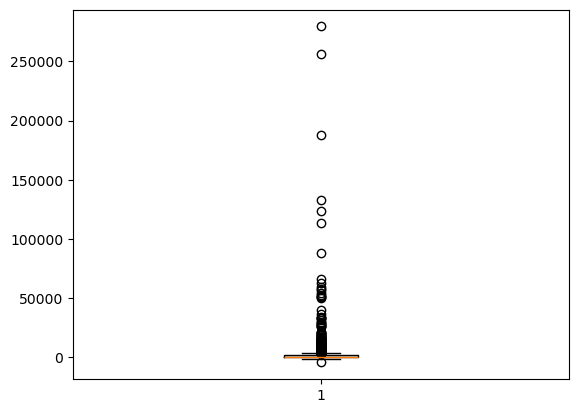

In [23]:
# Outlier treatment for Amount, Frequency and Recency

plt.boxplot(rfm_df['Amount'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x15c38f710>,
 'caps': [<matplotlib.lines.Line2D at 0x15c5e8ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c38eb50>],
 'medians': [<matplotlib.lines.Line2D at 0x15c5ea550>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c5eb010>],
 'means': []}

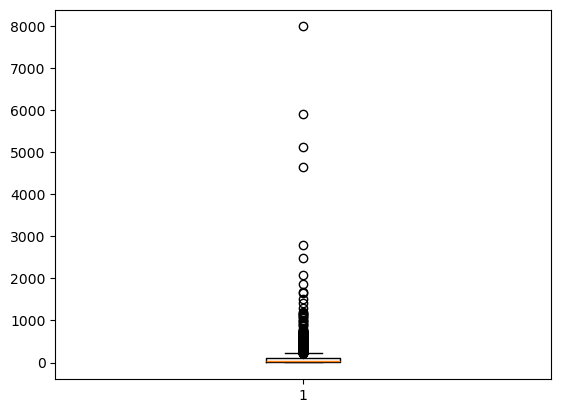

In [24]:
# Let's not remove the outliers as they are the customers who have spent the most amount and have business value

plt.boxplot(rfm_df['Frequency'])

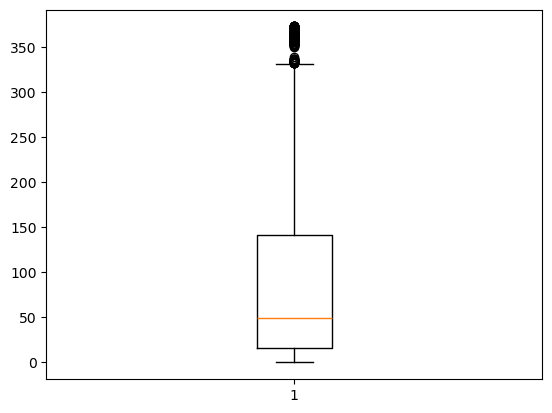

In [25]:

plt.boxplot(rfm_df['Recency'])
plt.show()

In [26]:
# Always discuss with business to treat the outliers

# For now we will treat the outliers based on statistics and not domain specific knowledge


# Let's treat the outliers and then plot the box plot

# Outlier treatment for Amount, Frequency and Recency

Q1 = rfm_df.Amount.quantile(0.05) # Taking lower 5% rather than 25%
Q3 = rfm_df.Amount.quantile(0.95) # Taking upper 5% rather than 75%
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Amount >= (Q1 - 1.5*IQR)) & (rfm_df.Amount <= (Q3 + 1.5*IQR))]

Q1 = rfm_df.Frequency.quantile(0.05) # Taking lower 5% rather than 25%
Q3 = rfm_df.Frequency.quantile(0.95) # Taking upper 5% rather than 75%
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Frequency >= (Q1 - 1.5*IQR)) & (rfm_df.Frequency <= (Q3 + 1.5*IQR))]

Q1 = rfm_df.Recency.quantile(0.05) # Taking lower 5% rather than 25%
Q3 = rfm_df.Recency.quantile(0.95) # Taking upper 5% rather than 75%
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Recency >= (Q1 - 1.5*IQR)) & (rfm_df.Recency <= (Q3 + 1.5*IQR))]

In [27]:
# Rescaling the attributes

from sklearn.preprocessing import StandardScaler

rfm_df_scaled = rfm_df[['Amount', 'Frequency', 'Recency']]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df_scaled)

In [28]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.head()

,0,1,2
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## Hopkins Statistics:

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.


https://en.wikipedia.org/wiki/Hopkins_statistic

In [29]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.955495380278653

### 4. Modelling

In [31]:
from sklearn.cluster import KMeans

#kmeans with some arbitrary k

help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

In [32]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [33]:
len(kmeans.labels_) 

4293

In [34]:
# Let's find out the optimal number of clusters

# Elbow curve

number_of_clusters = [2,3,4,5,6,7,8]
ssd = []

for i in number_of_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    print(i, kmeans.inertia_)
    ssd.append(kmeans.inertia_)

2 7661.701161911668
3 4433.580619302121
4 3360.7177555904846
5 2802.9894282024834
6 2392.006651226591
7 2039.292636682822
8 1825.783359040316


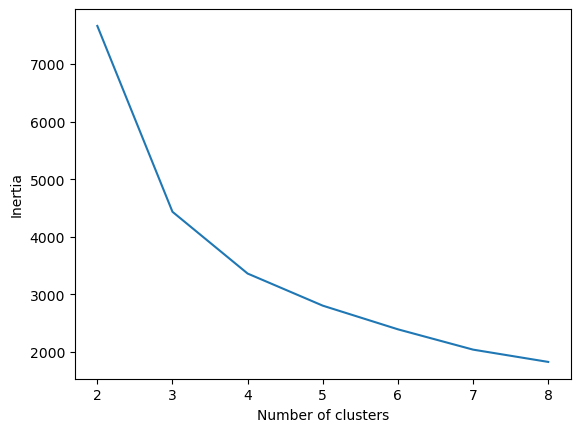

In [35]:
plt.plot(ssd)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(0,7), number_of_clusters)
plt.show()

It seems 3 is the optimal number of clusters, as after 3 the inertia is decreasing slowly

Silhoutte Analysis

silhoutte score = p-q/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

- The value of the silhouette score range lies between -1 to 1.
- A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [36]:
# Silhouette score

from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    # silhouette score
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4804304052368425
For n_clusters=5, the silhouette score is 0.4645801831125689
For n_clusters=6, the silhouette score is 0.41716581583425943
For n_clusters=7, the silhouette score is 0.4177054772702703
For n_clusters=8, the silhouette score is 0.4027309742100667


In [37]:
# Based on silhouette score, it seems 2 clusters is the optimal number of clusters
# But based on elbow curve, it seems 3 clusters is the optimal number of clusters

# Let's go with 3 clusters

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

rfm_df['Cluster_Id'] = kmeans.labels_

rfm_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


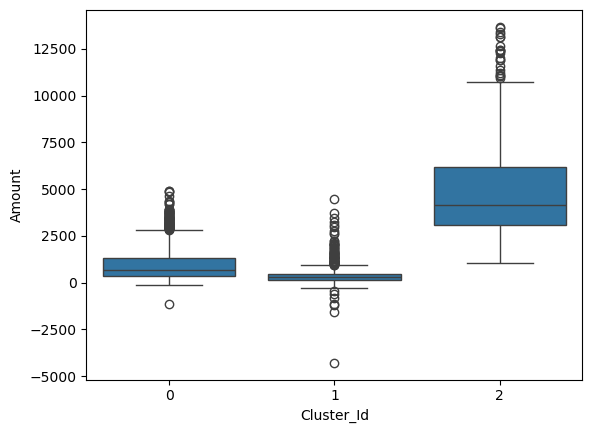

In [38]:
# Let's plot the clusters

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm_df)
plt.show()

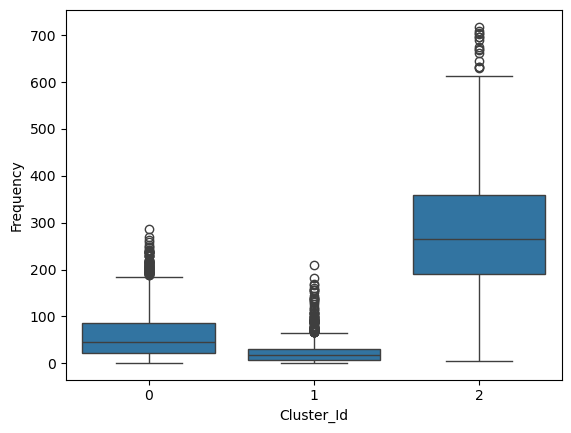

In [39]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_df)
plt.show()

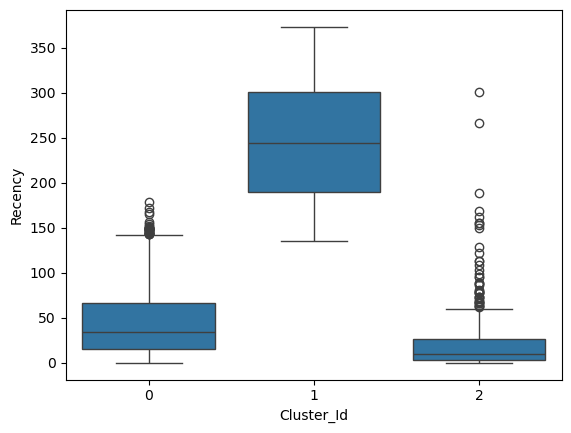

In [40]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_df)
plt.show()

-----END-----

In [41]:
cricket_df = pd.read_csv('Cricket.csv', encoding='ISO-8859-1', header=0, sep=',')
cricket_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [42]:
cricket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


In [43]:
# Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cricket_df_scaled = cricket_df[['SR', 'Ave']]

In [44]:
# Fit and transform the data

cricket_df_scaled = scaler.fit_transform(cricket_df_scaled)

In [45]:
# KMeans with 4 clusters

kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
kmeans.fit(cricket_df_scaled)

cricket_df['Cluster_Id'] = kmeans.labels_

cricket_df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Cluster_Id
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,3
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,0
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,1
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,0


In [46]:
cricket_df['Cluster_Id'].value_counts()

Cluster_Id
2    31
1    27
0    12
3     9
Name: count, dtype: int64

In [47]:
print(cricket_df[cricket_df['Player'] == 'V Kohli (INDIA)'])

             Player       Span  Mat  Inns  NO  Runs   HS    Ave    BF     SR  \
25  V Kohli (INDIA)  2008-2017  188   180  29  8146  183  53.94  8952  90.99   

    100  50   0  Cluster_Id  
25   27  43  11           3  


In [48]:
print(cricket_df[cricket_df['Cluster_Id'] == 3])

                     Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0      SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
13    MS Dhoni (Asia/INDIA)  2004-2017  295   255  70   9496  183*  51.32   
15  AB de Villiers (Afr/SA)  2005-2017  222   213  39   9319  162*  53.55   
25          V Kohli (INDIA)  2008-2017  188   180  29   8146   183  53.94   
34             HM Amla (SA)  2008-2017  156   153  10   7186   159  50.25   
38           MG Bevan (AUS)  1994-2004  232   196  67   6912  108*  53.58   
42        IVA Richards (WI)  1975-1991  187   167  24   6721  189*  47.00   
63          MJ Guptill (NZ)  2009-2017  146   143  16   5500  237*  43.30   
64         MEK Hussey (AUS)  2004-2012  185   157  44   5442  109*  48.15   

       BF      SR  100  50   0  Cluster_Id  
0   21367   86.23   49  96  20           3  
13  10706   88.69   10  64   8           3  
15   9295  100.25   24  53   7           3  
25   8952   90.99   27  43  11           3  
34  

## Heirarchical clustering

In [49]:
rfm_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


In [50]:
rfm_df_scaled.head()

,0,1,2
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [51]:
# Single linkage

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [195.0, 195.0, 221.25, 221.25],
  [180.0, 180.0, 208.125, 208.125],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [425.0, 425.0, 435.0, 435.0],
  [415.0, 415.0, 430.0, 430.0],
  [445.0, 445.0, 455.0, 455.0],
  [485.0, 485.0, 495.0, 495.0],
  [475.0, 475.0, 490.0, 490.0],
  [525.0, 525.0, 535.0, 535.0],
  [515.0, 515.0, 530.0, 530.0],
  [505.0, 505.0, 522.5, 522.5],
  [482.5, 482.5, 513.75, 513.75],
  [565.0, 565.0, 575.0, 575.0],
  [555.0, 555.0, 570.0, 570.0],
  [615.0, 615.0, 625.0, 625.0],
  [645.0, 645.0, 655.0, 655.0],
  [635.0, 635.0, 650.0, 650.0],
  [620.0, 620.0, 642.5, 642.5],
  [695.0, 695.0, 705.0, 70

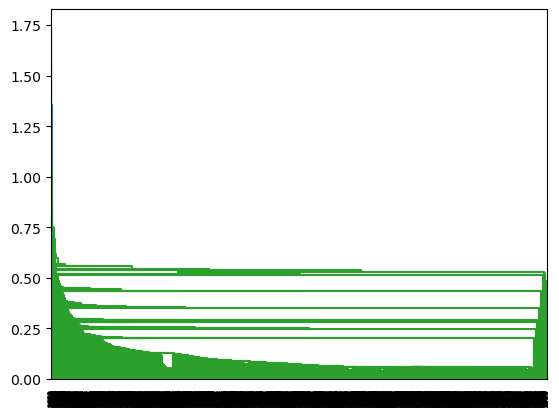

In [52]:
linkage_matrix = linkage(rfm_df_scaled, method='single', metric='euclidean')

dendrogram(linkage_matrix)
plt.show()

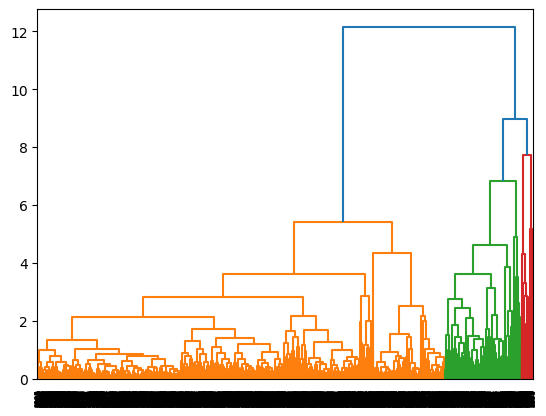

In [53]:
# Complete linkage
linkage_complete = linkage(rfm_df_scaled, method='complete', metric='euclidean')
dendrogram(linkage_complete)
plt.show()


In [57]:
# 3 clusters

cut_tree(linkage_complete, n_clusters=3).shape



(4293, 1)

In [59]:
# reshape the cut_tree output 

cluster_labels = cut_tree(linkage_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [60]:
rfm_df['Cluster_Labels'] = cluster_labels

In [61]:
rfm_df.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,2,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,1,0


<Axes: xlabel='Cluster_Labels', ylabel='Amount'>

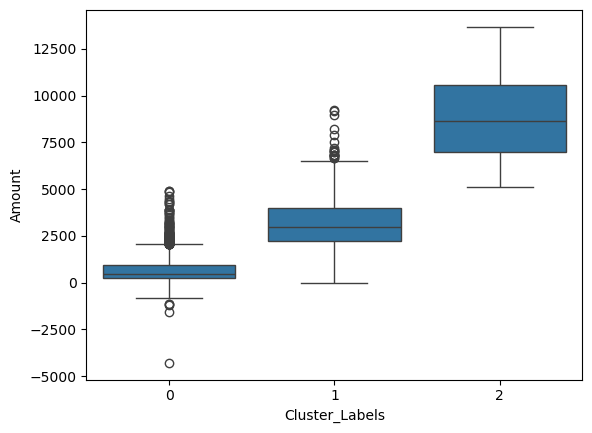

In [62]:
# Plots
sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm_df)

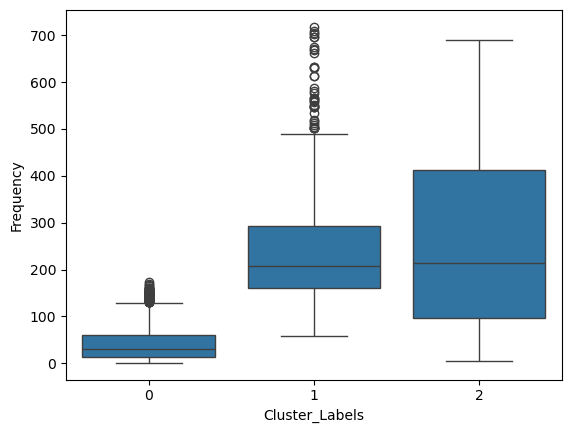

In [63]:
# Frequency
sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm_df)
plt.show()

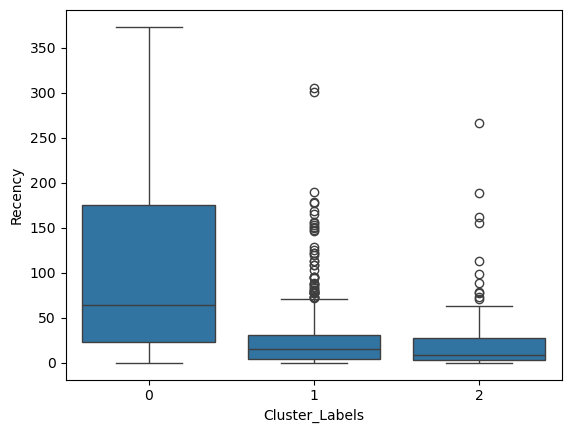

In [64]:
# Recency
sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm_df)
plt.show()